In [30]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

In [20]:
df = pd.read_csv("https://github.com/Venkat3103/2022Fall_projects/blob/main/ipl_2018_2020_bbb.csv?raw=true")
match_info = pd.read_csv("https://raw.githubusercontent.com/Venkat3103/2022Fall_projects/main/ipl_match_info.csv")
bowler_info = pd.read_excel("https://github.com/Venkat3103/2022Fall_projects/blob/main/bowler_info.xlsx?raw=true")
teamsheet = pd.read_csv('https://raw.githubusercontent.com/Venkat3103/2022Fall_projects/main/teamsheet.csv')

In [21]:
df.columns

Index(['Unnamed: 0', 'match_id', 'season', 'start_date', 'venue', 'innings',
       'ball', 'batting_team', 'bowling_team', 'striker', 'non_striker',
       'bowler', 'runs_off_bat', 'extras', 'wides', 'noballs', 'byes',
       'legbyes', 'penalty', 'wicket_type', 'player_dismissed',
       'other_wicket_type', 'other_player_dismissed'],
      dtype='object')

In [ ]:
df.drop(columns={"Unnamed: 0"},inplace=True)

##Data Preprocessing and feature engineering

In [22]:
df.ball.unique()

array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  1.1,  1.2,  1.3,  1.4,
        1.5,  1.6,  2.1,  2.2,  2.3,  2.4,  2.5,  2.6,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  4.1,  4.2,  4.3,  4.4,  4.5,  4.6,  4.7,  5.1,
        5.2,  5.3,  5.4,  5.5,  5.6,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  8.1,  8.2,  8.3,  8.4,
        8.5,  8.6,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6, 10.1, 10.2, 10.3,
       10.4, 10.5, 10.6, 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 12.1, 12.2,
       12.3, 12.4, 12.5, 12.6, 13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 14.1,
       14.2, 14.3, 14.4, 14.5, 14.6, 15.1, 15.2, 15.3, 15.4, 15.5, 15.6,
       16.1, 16.2, 16.3, 16.4, 16.5, 16.6, 16.7, 17.1, 17.2, 17.3, 17.4,
       17.5, 17.6, 18.1, 18.2, 18.3, 18.4, 18.5, 18.6, 18.7, 19.1, 19.2,
       19.3, 19.4, 19.5, 19.6,  1.7,  2.7,  5.7,  7.7, 11.7, 13.7, 15.7,
        9.7,  8.7, 18.8, 10.7, 12.7, 19.7, 19.8,  0.8,  6.8, 14.7, 17.7,
        2.8, 11.8, 11.9, 15.8,  3.7, 12.8, 12.9, 17

In [24]:
def adjust_ball_number(df):  
  """
  returns a dataframe with ball number in the range of .1 and .6
  :param df: dataframe with ball by ball data
  :return df: updated dataframe
  """
  for i in range(1,len(df)):
    if(df['match_id'][i] == df['match_id'][i-1] and df['innings'][i] == df['innings'][i-1]):
      if (not (math.isnan(df['wides'][i-1]))) or (not math.isnan(df['noballs'][i-1]) or (df['wicket_type'][i] == 'run out')):
        df['ball'][i] = df['ball'][i-1]
      elif(math.floor(df['ball'][i]) == math.floor(df['ball'][i-1])):
        df['ball'][i] = round(df['ball'][i-1]+.1,1)
        if(round(df['ball'][i] - math.floor(df['ball'][i]),1) > 0.6):
          curi = i
          while(df['ball'][curi] > math.floor(df['ball'][i]) and not df['legbyes'][curi] > 0):
            df['ball'][curi] = round(df['ball'][curi]-.1,1)
            curi -= 1
  return df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
adjust_ball_number(df)

In [25]:
df.ball.unique()

array([ 0.1,  0.2,  0.3,  0.4,  0.5,  1.1,  1.2,  1.3,  1.4,  1.5,  1.6,
        2.1,  2.2,  2.3,  2.4,  2.5,  2.6,  3.1,  3.2,  3.3,  3.4,  3.5,
        3.6,  4.1,  4.2,  4.3,  4.4,  4.5,  4.6,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,  7.1,  7.2,  7.3,
        7.4,  7.5,  7.6,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  9.1,  9.2,
        9.3,  9.4,  9.5,  9.6, 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 11.1,
       11.2, 11.3, 11.4, 11.5, 11.6, 12.1, 12.2, 12.3, 12.4, 12.5, 12.6,
       13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 14.1, 14.2, 14.3, 14.4, 14.5,
       14.6, 15.1, 15.2, 15.3, 15.4, 15.5, 15.6, 16.1, 16.2, 16.3, 16.4,
       16.5, 16.6, 17.1, 17.2, 17.3, 17.4, 17.5, 17.6, 18.1, 18.2, 18.3,
       18.4, 18.5, 18.6, 19.1, 19.2, 19.3, 19.4, 19.5,  0.6, 11. , 19.6])

In [67]:
df.columns

Index(['Unnamed: 0', 'match_id', 'season', 'start_date', 'venue', 'innings',
       'ball', 'batting_team', 'bowling_team', 'striker', 'non_striker',
       'bowler', 'runs_off_bat', 'extras', 'wides', 'noballs', 'byes',
       'legbyes', 'penalty', 'wicket_type', 'player_dismissed',
       'other_wicket_type', 'other_player_dismissed', 'phase'],
      dtype='object')

updating the recent team name change in the dataset

In [68]:
df["batting_team"] = np.where(df["batting_team"] == "Delhi Daredevils", "Delhi Capitals", df["batting_team"])
df["bowling_team"] = np.where(df["bowling_team"] == "Delhi Daredevils", "Delhi Capitals", df["bowling_team"])

adding a column to check if a wicket has fallen in that particular delivery

df['is_wicket'] = np.where(df['wicket_type'].isnull(),0,1)

In [3]:
def find_phase(ball):
  """
  Computes which phase a particular ball belongs to
  :param ball: the ball number in the match
  :return: phase as a string
  >>> find_phase(4.2)
  "powerplay"
  """
  if ball<=5.6:
    return "powerplay"
  elif ball<=15.6:
    return "middle overs"
  else:
    return "death overs"

In [ ]:
df['phase'] = np.vectorize(find_phase)(df['ball'])

In [ ]:
#match_info.drop(columns=["Unnamed: 0"],inplace=True)

In [ ]:
df.columns

In [ ]:
batting_phase_stats = pd.merge(df.groupby(['phase','batting_team'])['runs_off_bat'].sum().to_frame(),df.groupby(['phase','batting_team'])['ball'].count().to_frame(),on=["phase","batting_team"],how="inner")
batting_phase_stats['batting_run_rate'] = batting_phase_stats['runs_off_bat']*6/batting_phase_stats['ball']
pd.merge(batting_phase_stats,df.groupby(['phase','batting_team'])['is_wicket'].sum().to_frame(),on=['phase','batting_team'],how='inner')

In [ ]:
bowling_phase_stats = pd.merge(df.groupby(['phase','bowling_team'])['runs_off_bat'].sum().to_frame(),df.groupby(['phase','bowling_team'])['ball'].count().to_frame(),on=["phase","bowling_team"],how="inner")
bowling_phase_stats['bowling_run_rate'] = bowling_phase_stats['runs_off_bat']*6/bowling_phase_stats['ball']
bowling_phase_stats = pd.merge(bowling_phase_stats,df.groupby(['phase','bowling_team'])['is_wicket'].sum().to_frame(),on=['phase','bowling_team'],how='inner')
bowling_phase_stats

**Hypothesis 1**

**Overview**
> There are three phases to a game of Twenty20 namely the powerplay, the middle overs and the death overs. It is believed that the teams which exploit the powerplay (explained below) tend to get the upper-hand in the game. However, teams have different approaches to different phases, and we are interested to analyze which phase do successful teams target and maximize the output in order to produce better results.

**Hypothesis: Teams exploiting the Powerplay (overs 1-6) tend to win games more often.**



> Powerplay is the first six overs of a twenty over game where there is a fielding restriction imposed. The restriction is that only two fielders are allowed to field outside of the thirty yard circle (image shown for reference). If a batter hits the ball past the boundary, they are awared 4 or 6 runs based on whether or not the ball bounced before crossing the boundary. In the case where there are only two fielders guarding the boundary, it makes it easier for the batter to score boundaries. This proves to be advantageous to the batting team as they get to score more runs at a faster rate. Hence batting teams tend to exploit this to their advantage. So the team that maximises the powerplay is expected to have a upper hand in the game.



---

> https://aassjournal.com/article-1-283-en.pdf suggests that 69.5 percentage of the times teams which win the powerplay (based on the proposed Prod metric) tend to win the game. There are various factors taken into consideration devising the Prod method. The basis of the Prod metric is from a metric proposed in https://www.ajol.info/index.php/sajrs/article/view/25909.



---

> The data used in the journal article is for the years 2012 to 2015 where a total of 261 matches have been analyzed which is a good sample size. But the sport has evolved post that with data analytics and teams have started to strategise better. Hence more recent years (2018-2020) have been taken into consideration to understand if the trends still hold the same. 



---

>1. A major flaw in this paper is that they have not taken into consideration the other phases of the game to make a comparative study. While the hypothesis that teams which tend to win the powerplay go on to win the match holds true 69.5 percent of the times according to the paper, it fails to determine how other phases affect the final outcome of the game. 

> In this project, we take into account all the phases of the game and analyze performing well in which phase contributes more to the outcome of the game.


---


> 2. The journal article makes a statement that "When top order batsmen lose their wickets, the strength of the team is weakened more than
when lower order batsmen lose their wickets." We also attempt to analyze if this statement holds true as the quality of batters has increased in the market and with IPL following an auction system, teams have started recruiting quality middle and lower order batters who are as good as or even sometimes better than top order batters in the respective roles they perform. This will be a sub hypothesis that we will analyze. 

> H1.1 - Top order batters contribute more than the middle and lower order batters and hence their wickets are of higher value. 



---


>3. If H1.1 does not hold true, considering wickets in H1 to analyze team performance is not significant. With the knowledge of the sport we posses, we have tried to bring down the number of features used to analyze the performance of teams. 

> Since the baseline of the sport is that the team which scores more runs than the other team wins, we analyze two features in this project. First being how many runs are being scored in each of the phases, and the second factor being how fast are the runs scored. If a team scores more runs at a higher rate than the other team, they win that particular phase of the game. This will also help us understand how different teams go about different phases of the game and in which phase they tend to attack more.



---

> We are interested in analyzing the probabilty of a team winning a game given that they win phase X. We compare the probablity that a team wins the game given that they win the win the phase and conclude that the phase with the higher probabilty is a more impactful phase.


Source: https://thesportsvision.wordpress.com/2015/03/24/sports-you-should-know-ii-cricket/ (Also more about cricket)


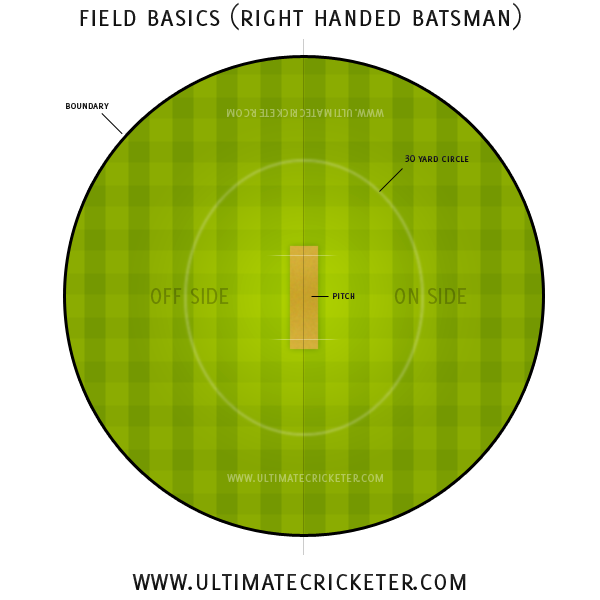

Categorization: (Total of 20 Overs)
1. Powerplay - Overs 1 - 6
2. Middle Overs - Overs 7-16
3. Death Overs - Overs 17-20

In [ ]:
def find_phase(ball):
  """
  Computes which phase a particular ball belongs to
  :param ball: the ball number in the match
  :return: phase as a string

  >>> find_phase(4.2)
  'powerplay'
  >>> find_phase(15.2)
  'middle overs'
  >>> find_phase(18.0)
  'death overs'
  """

  if ball<=5.6:
    return "powerplay"
  elif ball<=15.6:
    return "middle overs"
  else:
    return "death overs"
import doctest
doctest.testmod()

In [ ]:
df['phase'] = np.vectorize(find_phase)(df['ball'])

#Compute Total Runs Scored

In [ ]:
def compute_total_runs(df):
    for i in range (1,len(df)):
      if df['ball'][i]!=0.1 or (df['ball'][i]==0.1 and df['ball'][i-1]==0.1):
        df['total_runs_scored'][i] = df['total_runs_scored'][i-1] + df['runs_off_bat'][i-1] + df['extras'][i-1]

In [ ]:
df['total_runs_scored'] = 0
compute_total_runs(df)

In [ ]:
def compute_team_score_and_target(df):
  df_inn2 = df[df['innings']==2]
  df_inn1 = df[df['innings']==1]
  df_inn2['team_score'] = df_inn2['total_runs_scored'] + df_inn2['runs_off_bat'] + df_inn2['extras']
  df_inn1['team_score'] = df_inn1['total_runs_scored'] + df_inn1['runs_off_bat'] + df_inn1['extras']
  trs2 = df_inn2.groupby(['match_id'])['team_score'].max().to_frame()
  trs2.rename(columns={'team_score':'team_total'},inplace=True)
  df_inn2 = pd.merge(trs2,df_inn2,on=["match_id"],how="inner")
  trs1 = df_inn1.groupby(['match_id'])['team_score'].max().to_frame()
  trs1.rename(columns={'team_score':'target'},inplace=True)
  df_inn2 = pd.merge(trs1,df_inn2,on=["match_id"],how="inner")
  df_inn2['target']+=1
  return df_inn1,df_inn2

In [ ]:
df_inn1,df_inn2 = compute_team_score_and_target(df)

In [ ]:
def compute_team_score_and_target(df):
  df_inn2 = df[df['innings']==2]
  df_inn1 = df[df['innings']==1]
  df_inn2['team_score'] = df_inn2['total_runs_scored'] + df_inn2['runs_off_bat'] + df_inn2['extras']
  df_inn1['team_score'] = df_inn1['total_runs_scored'] + df_inn1['runs_off_bat'] + df_inn1['extras']
  trs2 = df_inn2.groupby(['match_id'])['team_score'].max().to_frame()
  trs2.rename(columns={'team_score':'team_total'},inplace=True)
  df_inn2 = pd.merge(trs2,df_inn2,on=["match_id"],how="inner")
  trs1 = df_inn1.groupby(['match_id'])['team_score'].max().to_frame()
  trs1.rename(columns={'team_score':'target'},inplace=True)
  df_inn2 = pd.merge(trs1,df_inn2,on=["match_id"],how="inner")
  df_inn2['target']+=1
  return df_inn1,df_inn2

In [ ]:
df_inn1,df_inn2 = compute_team_score_and_target(df)